# CHW03_Q1_99106352

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split
from scipy.interpolate import Rbf
from sklearn.metrics import accuracy_score

## Load Data

In [2]:
# Load .mat file
mat_data = scipy.io.loadmat('SampleData.mat')

In [3]:
TrainingData = mat_data['TrainingData'].T
TrainingLabels = mat_data['TrainingLabels'].T[:,0]

## A. Plot Data

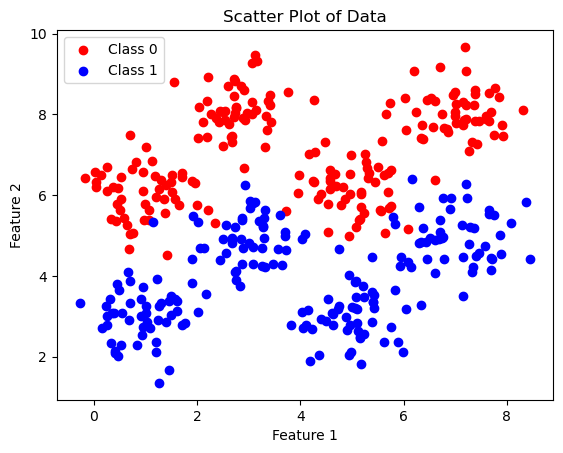

In [4]:
plt.scatter(TrainingData[(TrainingLabels == 0), 0], TrainingData[(TrainingLabels == 0), 1], color='r', label='Class 0')
plt.scatter(TrainingData[(TrainingLabels == 1), 0], TrainingData[(TrainingLabels == 1), 1], color='b', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

## B. Split Data

In [5]:
X_train, X_val, y_train, y_val = train_test_split(TrainingData, TrainingLabels, test_size=0.3, random_state=42)

## C

In [24]:
rbf_model = Rbf(X_train[:, 0], X_train[:, 1], y_train, function='multiquadric', smooth=1.0)

y_val_pred = np.round(rbf_model(X_val[:, 0], X_val[:, 1]))
accuracy = accuracy_score(y_val, y_val_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 97.50%


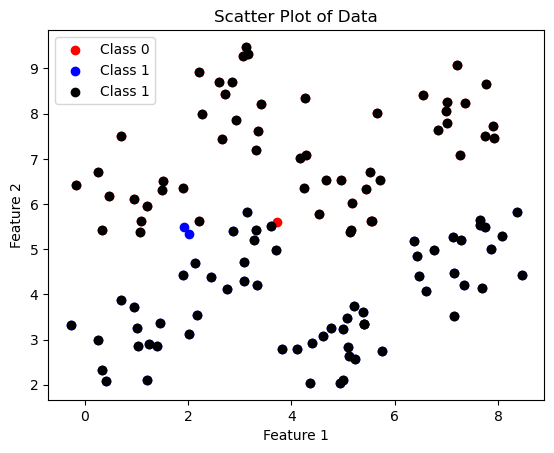

In [23]:
plt.scatter(X_val[(y_val == 0), 0], X_val[(y_val == 0), 1], color='r', label='Class 0')
plt.scatter(X_val[(y_val == 1), 0], X_val[(y_val == 1), 1], color='b', label='Class 1')
plt.scatter(X_val[(y_val_pred == y_val), 0], X_val[(y_val_pred == y_val), 1], color='black', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()